In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import localSettings as ls
import math
print(ls.main_path)


/Users/elenag/Desktop/PlotterLEE/


In [3]:
main_path = ls.main_path
sys.path.append(main_path)

In [4]:
from datetime import datetime
now = datetime.now()
date_time = now.strftime("%m%d%Y")
print("date and time:",date_time)

date and time: 02022021


In [43]:
def calculateRatioErrorBar (num, den):
    if den:
        if num/(den*den)*(1-num/den) > 0:
            return math.sqrt(num/(den*den)*(1-num/den)   )
    return 0
    
def calculateErrorBar (num, den):
    errors = []
    for i,s in enumerate(num):
        errors.append(calculateRatioErrorBar (num[i], den[i]))
    return errors


def ratioPlot(n1,n3,bins, title):
    ratioRun    = np.divide(n1, n3, out=np.zeros_like(n3), where=n1!=0)
    bincenters  = 0.5*(bins[1:]+bins[:-1])
    width       = (bins[1:]-bins[:-1])
    errrRun     = calculateErrorBar(n1, n3)

    
    fig, ax = plt.subplots()
    ax.plot(bincenters, ratioRun, marker="o",markersize=4., linestyle="",  color="r")
    ax.bar (bincenters, ratioRun, width=width,  yerr=errrRun, alpha=0.75,fill=False,ecolor='r',edgecolor='w')


    ax.set_xlabel(title)
    ax.set_ylabel("Ratio")
    ax.set_title("Run1/Run3")
    ax.legend()
    fig.tight_layout()
    plt.show()

In [5]:
import plotter
import importlib
importlib.reload(plotter)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np


params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

In [20]:
tree = "NeutrinoSelectionFilter"
Run1On  = 'fullData/neutrinoselection_filt_run1_overlay_intrinsic'+ls.APPEND
Run3On  = 'fullData/neutrinoselection_filt_run3b_overlay_intrinsic'+ls.APPEND

Run1On  = 'fullData/neutrinoselection_filt_run1_beamon_beamgood' +ls.APPEND
Run3On  = 'fullData/neutrinoselection_filt_run3b_beamon_beamgood'+ls.APPEND


run1On   = uproot.open(ls.ntuple_path+Run1On +".root")[ls.fold][tree]
run3On  = uproot.open(ls.ntuple_path+Run3On+".root")[ls.fold][tree]


uproot_v = [run1On,run3On] 

variables = ["run", "sub", "evt", "flash_time","nslice","flash_pe"]

#make the list unique
variables = list(set(variables))
print(variables)



    
run1On = run1On.pandas.df(variables, flatten=False)
run3On = run3On.pandas.df(variables, flatten=False)



['sub', 'flash_pe', 'flash_time', 'run', 'evt', 'nslice']


In [21]:
#reset timing
#df_v = [mc,nue,dirt]
#for i,df in enumerate(df_v):
#        df.loc[ :, 'flash_time' ] = df['flash_time' ] - 0.304

#df_v = [ext]
#for i,df in enumerate(df_v):
#        df.loc[ :, 'flash_time' ] = df['flash_time' ] - 0.359

# Plotting part

In [22]:
#ext1 = 9199232.74
#ext3 = 32878305.25

# Overlay Intrinsic
potRun1 = 2.37838
potRun3 = 2.5345

#On Beam data
potRun1 =  2e+20 #partial file: 8.885e+19
potRun3 =  5e+20 #partial file: 8.885e+19


No handles with labels found to put in legend.


Run1 0 slice percentage:  0.8420202589369955
Run3 0 slice percentage:  0.8109438230125218


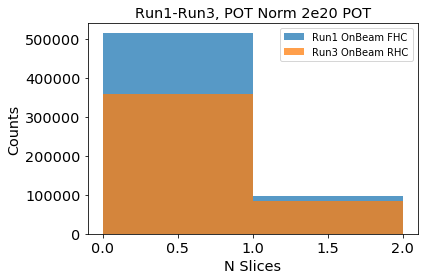

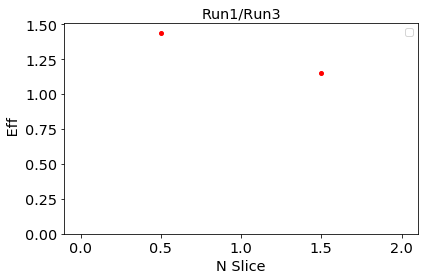

In [42]:
s1 = run1On["nslice"]
s3 = run3On["nslice"]
#run3On["normalize"] = ext1/ext3#1./1.83658852 #potRun1/potRun3
run3On["normalize"] = potRun1/potRun3
fig, ax = plt.subplots()
n1_0, bins, patches = ax.hist(s1, 2,range=(0,2), alpha=0.75, label="Run1 OnBeam FHC")
n3_0, bins, patches = ax.hist(s3, 2,range=(0,2), alpha=0.75, label="Run3 OnBeam RHC",weights=run3On["normalize"])
print("Run1 0 slice percentage: ", n1_0[0]/(n1_0[0]+n1_0[1]))
print("Run3 0 slice percentage: ",n3_0[0]/(n3_0[0]+n3_0[1]))
ax.set_xlabel('N Slices')
ax.set_ylabel('Counts')
ax.set_title('Run1-Run3, POT Norm 2e20 POT')
ax.legend()
fig.tight_layout()
ratioPlot(n1_0, n3_0, bins,'N Slice')
#    fig.savefig("../plots/run1run3/"+interaction+"_"+tag+".pdf")


No handles with labels found to put in legend.


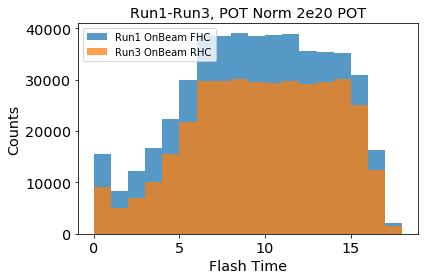

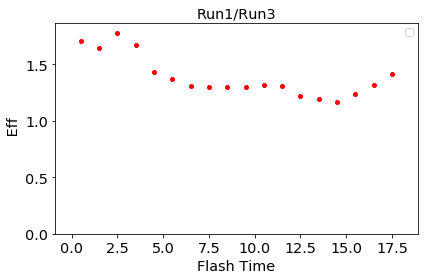

In [41]:
s1 = run1On["flash_time"]
s3 = run3On["flash_time"]
#run3On["normalize"] = ext1/ext3#1./1.83658852 #potRun1/potRun3
run3On["normalize"] = potRun1/potRun3
fig, ax = plt.subplots()
n1_0, bins, patches = ax.hist(s1, 18,range=(0,18), alpha=0.75, label="Run1 OnBeam FHC")
n3_0, bins, patches = ax.hist(s3, 18,range=(0,18), alpha=0.75, label="Run3 OnBeam RHC",weights=run3On["normalize"])
ax.set_xlabel('Flash Time')
ax.set_ylabel('Counts')
ax.set_title('Run1-Run3, POT Norm 2e20 POT')
ax.legend()
fig.tight_layout()
ratioPlot(n1_0, n3_0, bins,'Flash Time')

No handles with labels found to put in legend.


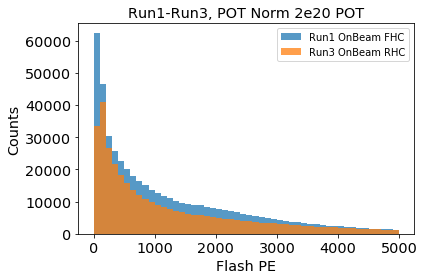

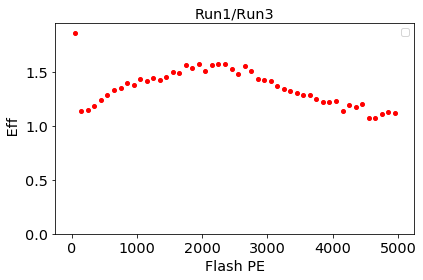

In [40]:
s1 = run1On["flash_pe"]
s3 = run3On["flash_pe"]
run3On["normalize"] = potRun1/potRun3
fig, ax = plt.subplots()
n1_0, bins, patches = ax.hist(s1, 50,range=(0,5000), alpha=0.75, label="Run1 OnBeam FHC")
n3_0, bins, patches = ax.hist(s3, 50,range=(0,5000), alpha=0.75, label="Run3 OnBeam RHC",weights=run3On["normalize"])
ax.set_xlabel('Flash PE')
ax.set_ylabel('Counts')
ax.set_title('Run1-Run3, POT Norm 2e20 POT')
ax.legend()
fig.tight_layout()

ratioPlot(n1_0, n3_0, bins,'Flash PE')
